In [1]:
from src.utils import getDF
from src.preprocessing import preprocessing
import pandas as pd
import argparse
import json
from pathlib import Path
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
BASE_DIR = Path('./term').resolve().parent
DATA_DIR = BASE_DIR / "data"

################Data Load############
all_review = getDF(DATA_DIR / "All_Beauty_5.json.gz")
all_meta = getDF(DATA_DIR / 'meta_All_Beauty.json.gz')
with open(DATA_DIR / "all_fill.json", "r", encoding="utf-8") as f:
    all_fill = json.load(f)

lxr_review = getDF(DATA_DIR / "Luxury_Beauty_5.json.gz")
lxr_meta = getDF(DATA_DIR / 'meta_Luxury_Beauty.json.gz')
with open(DATA_DIR / "luxury_fill.json", "r", encoding="utf-8") as f:
    lxr_fill = json.load(f)

######################Preprocessing#######################
all_review, all_meta = preprocessing(all_review, all_meta, all_fill, DATA_DIR)
lxr_review, lxr_meta = preprocessing(lxr_review, lxr_meta, lxr_fill, DATA_DIR)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

df = all_review.copy()

# 날짜 변환
df["reviewTime"] = pd.to_datetime(df["reviewTime"], format="%m %d, %Y", errors="coerce")

############################################
# 1. reviewTime: 월별 리뷰 개수 (line plot)
############################################
plt.figure(figsize=(12,4))
df.groupby(df["reviewTime"].dt.to_period("M")).size().to_timestamp().plot()

plt.title("Review Count Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

############################################
# 2. reviewerID: 유저별 리뷰 개수 → 히스토그램
############################################
reviewer_counts = df["reviewerID"].value_counts()

plt.figure(figsize=(8,4))
plt.hist(reviewer_counts, bins=30, edgecolor="black", alpha=0.8)

plt.title("Distribution of Number of Reviews per User", fontsize=14, fontweight="bold")
plt.xlabel("Number of Reviews (per User)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

############################################
# 3. overall: 평점 분포 (bar plot)
############################################
plt.figure(figsize=(6,4))
df["overall"].value_counts().sort_index().plot(kind="bar", edgecolor="black")

plt.title("Overall Rating Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

############################################
# 4. asin: 제품별 리뷰 개수 → 히스토그램
############################################
asin_counts = df["asin"].value_counts()

plt.figure(figsize=(8,4))
plt.hist(asin_counts, bins=30, edgecolor="black", alpha=0.8)

plt.title("Distribution of Number of Reviews per Product (ASIN)", fontsize=14, fontweight="bold")
plt.xlabel("Number of Reviews (per Product)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


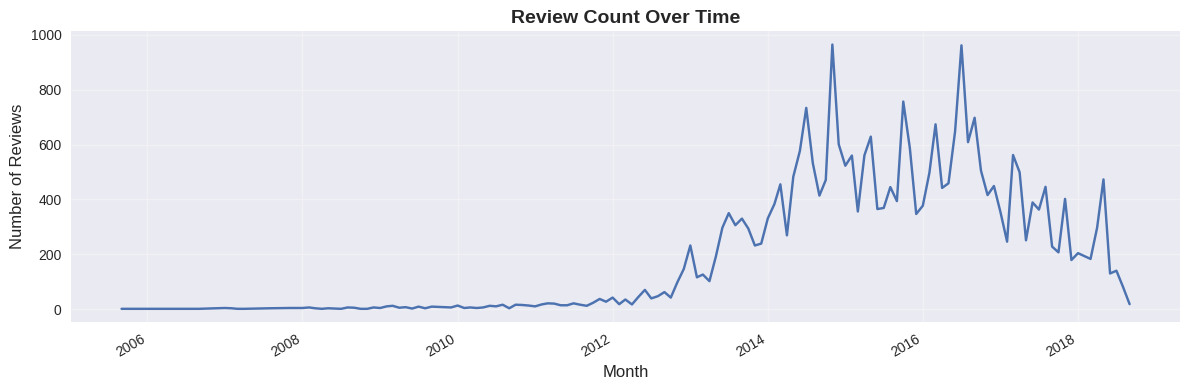

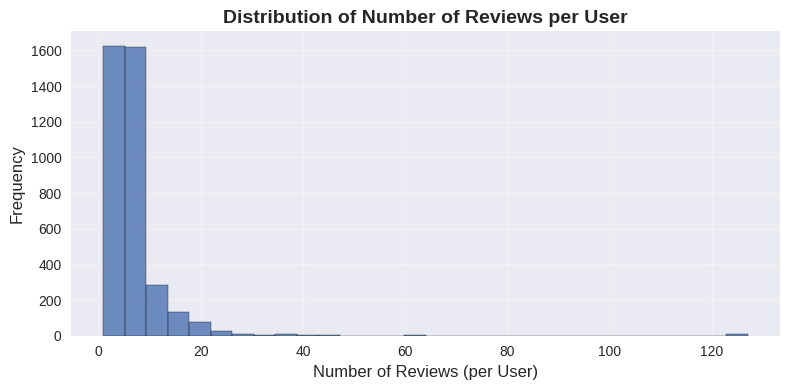

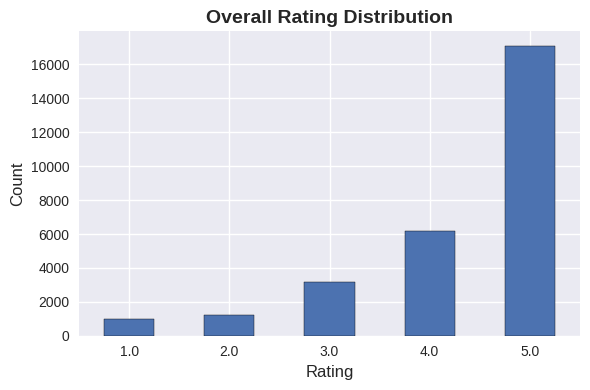

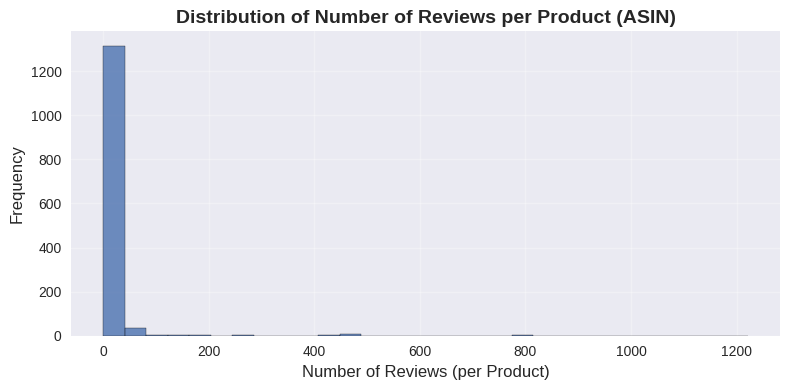

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

df = lxr_review.copy()

# 날짜 변환
df["reviewTime"] = pd.to_datetime(df["reviewTime"], format="%m %d, %Y", errors="coerce")

############################################
# 1. reviewTime: 월별 리뷰 개수 (line plot)
############################################
plt.figure(figsize=(12,4))
df.groupby(df["reviewTime"].dt.to_period("M")).size().to_timestamp().plot()

plt.title("Review Count Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

############################################
# 2. reviewerID: 유저별 리뷰 개수 → 히스토그램
############################################
reviewer_counts = df["reviewerID"].value_counts()

plt.figure(figsize=(8,4))
plt.hist(reviewer_counts, bins=30, edgecolor="black", alpha=0.8)

plt.title("Distribution of Number of Reviews per User", fontsize=14, fontweight="bold")
plt.xlabel("Number of Reviews (per User)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

############################################
# 3. overall: 평점 분포 (bar plot)
############################################
plt.figure(figsize=(6,4))
df["overall"].value_counts().sort_index().plot(kind="bar", edgecolor="black")

plt.title("Overall Rating Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

############################################
# 4. asin: 제품별 리뷰 개수 → 히스토그램
############################################
asin_counts = df["asin"].value_counts()

plt.figure(figsize=(8,4))
plt.hist(asin_counts, bins=30, edgecolor="black", alpha=0.8)

plt.title("Distribution of Number of Reviews per Product (ASIN)", fontsize=14, fontweight="bold")
plt.xlabel("Number of Reviews (per Product)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
all_review[all_review['reviewText']=='yum']

,asin,overall,reviewerID,reviewTime,reviewText
736,B0009RF9DW,5.0,A105A034ZG9EHO,"07 6, 2014",yum
1119,B000FI4S1E,5.0,A105A034ZG9EHO,"07 6, 2014",yum
1974,B000URXP6E,5.0,A105A034ZG9EHO,"07 6, 2014",yum


In [ ]:
len(all_review['reviewerID'].unique())

991

In [ ]:
len(all_review['reviewerID'].unique()) + len(lxr_review['reviewerID'].unique())

4810

In [ ]:
pd.concat([all_meta, lxr_meta], axis=0)

,description,title,asin
0,INDICATIONS: Aqua Velva Cooling After Shave Ex...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce",B0000530HU
1,<P><STRONG>Restores Moisture to Dehydrated Hai...,Citre Shine Moisture Burst Shampoo - 16 fl oz,B00006L9LC
2,"A richly pigmented, micronized powder formula ...","NARS Blush, Taj Mahal",B00021DJ32
3,Avalon Organics Wrinkle Therapy Cleansing Milk...,Avalon Organics Wrinkle Therapy CoQ10 Cleansin...,B0002JHI1I
4,"We bring you this all-natural, luxury Zum bar ...","ZUM Zum Bar Anise Lavender, 3 Ounce",B0006O10P4
...,...,...,...
1572,It is specifically designed to helps to repair...,TIZO Photoceutical AM Replenish SPF 40 Sunscre...,B01GOZ61O8
1573,Stay bright with our restorative silkening tre...,ORIBE Bright Blonde Radiance and Repair Treatm...,B01H353HUY
1574,The mudder of all mud masks. Patchologys revol...,Patchology Detox SmartMud No Mess Mud Sheet Ma...,B01H353FLA
1575,Vita Liberata Body Blur Instant HD Skin Finish...,Vita Liberata Body Blur Instant HD Skin Finish...,B01H353A74


In [ ]:
pd.concat([all_meta, lxr_meta], axis=0)['asin'].value_counts()

asin
B01HGSJPMW    1
B0000530HU    1
B00006L9LC    1
B00021DJ32    1
B0002JHI1I    1
             ..
B000WR2HB6    1
B000W0C07Y    1
B000VV1YOY    1
B000VUXCGI    1
B000V5Z4J6    1
Name: count, Length: 1662, dtype: int64

In [9]:
all_meta

,description,title,asin
0,INDICATIONS: Aqua Velva Cooling After Shave Ex...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce",B0000530HU
1,<P><STRONG>Restores Moisture to Dehydrated Hai...,Citre Shine Moisture Burst Shampoo - 16 fl oz,B00006L9LC
2,"A richly pigmented, micronized powder formula ...","NARS Blush, Taj Mahal",B00021DJ32
3,Avalon Organics Wrinkle Therapy Cleansing Milk...,Avalon Organics Wrinkle Therapy CoQ10 Cleansin...,B0002JHI1I
4,"We bring you this all-natural, luxury Zum bar ...","ZUM Zum Bar Anise Lavender, 3 Ounce",B0006O10P4
...,...,...,...
76,Launched by the design house of dolce and gabb...,"Dolce &amp; Gabbana Compact Parfum, 0.05 Ounce",B019V2KYZS
77,Colgate Kids Maximum Cavity Protection Pump To...,Colgate Kids Maximum Cavity Protection Pump To...,B01BNEYGQU
78,Thousands of happy customers. Thousands of hap...,Bali Secrets Natural Deodorant - Organic &amp;...,B01DKQAXC0
79,PVC Pockets can be used for the wet things.\n\...,Mosunx(TM) Pocket trip Hanging Toiletry Bags C...,B01DLR9IDI


In [51]:
import pandas as pd
import gzip
import json
import numpy as np


def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [61]:
l_meta = getDF('./data/meta_All_Beauty.json.gz').replace(["[]", "{}", "", " ", "nan", "NaN", "None",], np.nan)

In [64]:
l_meta['description'][0][0]

"Loud 'N Clear Personal Sound Amplifier allows you to turn up the volume on what people around you are saying, listen at the level you want without disturbing others, hear a pin drop from across the room."

In [54]:
l_review = getDF('./data/Luxury_Beauty_5.json.gz')
l_meta = getDF('./data/meta_All_Beauty.json.gz').replace(["[]", "{}", "", " ", "nan", "NaN", "None",], np.nan)

l_meta.to_csv('./data/tmp.csv', index=False)
l_meta = pd.read_csv('./data/tmp.csv',
                na_values=["[]", "{}", "", " ", "None", "nan"])

In [31]:
l_meta[l_meta['asin']=='B00021CQTA']

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
290,NaN,NaN,NaN,NaN,Sephora Brand Super Shimmer Lip Gloss Think Pink,NaN,NaN,NaN,NaN,"3,064,724 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B00021CQTA'},All Beauty,NaN,NaN,NaN,B00021CQTA,NaN,NaN
694,NaN,NaN,NaN,NaN,Sephora Brand Super Shimmer Lip Gloss Think Pink,NaN,NaN,NaN,NaN,"3,064,724 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B00021CQTA'},All Beauty,NaN,NaN,NaN,B00021CQTA,NaN,NaN


In [34]:
l_meta.drop_duplicates(subset='asin', keep='first').info()

<class 'pandas.core.frame.DataFrame'>
Index: 32488 entries, 0 to 32891
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         0 non-null      float64
 1   tech1            10 non-null     object 
 2   description      14832 non-null  object 
 3   fit              0 non-null      float64
 4   title            32487 non-null  object 
 5   also_buy         6557 non-null   object 
 6   tech2            0 non-null      float64
 7   brand            16914 non-null  object 
 8   feature          263 non-null    object 
 9   rank             32149 non-null  object 
 10  also_view        8002 non-null   object 
 11  details          32381 non-null  object 
 12  main_cat         32488 non-null  object 
 13  similar_item     1300 non-null   object 
 14  date             19 non-null     object 
 15  price            11348 non-null  object 
 16  asin             32488 non-null  object 
 17  imageURL         

In [33]:
l_meta

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,NaN,NaN,"[""Loud 'N Clear Personal Sound Amplifier allow...",NaN,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,NaN,idea village,NaN,"2,938,573 in Beauty & Personal Care (",NaN,{'ASIN: ': '6546546450'},All Beauty,NaN,NaN,NaN,6546546450,NaN,NaN
1,NaN,NaN,['No7 Lift & Luminate Triple Action Serum 50ml...,NaN,No7 Lift &amp; Luminate Triple Action Serum 50...,"['B01E7LCSL6', 'B008X5RVME']",NaN,NaN,NaN,"872,854 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$44.99,7178680776,NaN,NaN
2,NaN,NaN,"[""No7 Stay Perfect Foundation now stays perfec...",NaN,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,NaN,No7,NaN,"956,696 in Beauty & Personal Care (","['B01B8BR0O8', 'B01B8BR0NO', 'B014MHXXM8']","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$28.76,7250468162,NaN,NaN
3,NaN,NaN,NaN,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,['B0041PBXX8'],NaN,NaN,NaN,"1,870,258 in Beauty & Personal Care (",NaN,"{'\n Item Weight: \n ': '1.76 ounces', '...",All Beauty,NaN,NaN,NaN,7367905066,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
4,NaN,NaN,['Lacto Calamine Skin Balance Daily Nourishing...,NaN,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,NaN,Pirmal Healthcare,NaN,"67,701 in Beauty & Personal Care (","['3254895630', 'B007VL1D9S', 'B00EH9A0RI', 'B0...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,NaN,NaN,$12.15,7414204790,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,NaN,NaN,NaN,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B01HIWLLUK'},All Beauty,NaN,NaN,$9.95,B01HIWLLUK,NaN,NaN
32888,NaN,NaN,NaN,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,NaN,Salon Perfect,NaN,"1,639,713 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,NaN,NaN,NaN,B01HJ1K3YK,NaN,NaN
32889,NaN,NaN,NaN,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"['B01KON9B4S', 'B079X3YFXS', 'B00M79OYS6', 'B0...",NaN,NaN,NaN,"207,410 in Beauty & Personal Care (","['B01KON9B4S', 'B000JN4CR0', 'B071ZHMRHS', 'B0...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,NaN,NaN,$55.63,B01HJ84SGM,NaN,NaN
32890,NaN,NaN,['Brand new and high quality<br> Enables fast ...,NaN,12 White Feather Shuttlecocks Birdies Badminto...,NaN,NaN,GBSTORE,NaN,"965,673 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$12.99,B01HJASD20,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [29]:
l_meta['asin'].value_counts()

asin
B00021CQTA    2
B00021D8LK    2
B00021CWYO    2
B00021C22G    2
B00021BS62    2
             ..
B00H3VQVQG    1
B00H3UMN6Y    1
B00H3R26DC    1
B00H3R25E2    1
B00H4GGVTM    1
Name: count, Length: 32488, dtype: int64

In [25]:
len(l_review['reviewerID'].unique())

991

In [19]:
l_meta

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,NaN,NaN,"[""Loud 'N Clear Personal Sound Amplifier allow...",NaN,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,NaN,idea village,NaN,"2,938,573 in Beauty & Personal Care (",NaN,{'ASIN: ': '6546546450'},All Beauty,NaN,NaN,NaN,6546546450,NaN,NaN
1,NaN,NaN,['No7 Lift & Luminate Triple Action Serum 50ml...,NaN,No7 Lift &amp; Luminate Triple Action Serum 50...,"['B01E7LCSL6', 'B008X5RVME']",NaN,NaN,NaN,"872,854 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$44.99,7178680776,NaN,NaN
2,NaN,NaN,"[""No7 Stay Perfect Foundation now stays perfec...",NaN,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,NaN,No7,NaN,"956,696 in Beauty & Personal Care (","['B01B8BR0O8', 'B01B8BR0NO', 'B014MHXXM8']","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$28.76,7250468162,NaN,NaN
3,NaN,NaN,NaN,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,['B0041PBXX8'],NaN,NaN,NaN,"1,870,258 in Beauty & Personal Care (",NaN,"{'\n Item Weight: \n ': '1.76 ounces', '...",All Beauty,NaN,NaN,NaN,7367905066,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
4,NaN,NaN,['Lacto Calamine Skin Balance Daily Nourishing...,NaN,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,NaN,Pirmal Healthcare,NaN,"67,701 in Beauty & Personal Care (","['3254895630', 'B007VL1D9S', 'B00EH9A0RI', 'B0...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,NaN,NaN,$12.15,7414204790,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,NaN,NaN,NaN,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B01HIWLLUK'},All Beauty,NaN,NaN,$9.95,B01HIWLLUK,NaN,NaN
32888,NaN,NaN,NaN,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,NaN,Salon Perfect,NaN,"1,639,713 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,NaN,NaN,NaN,B01HJ1K3YK,NaN,NaN
32889,NaN,NaN,NaN,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"['B01KON9B4S', 'B079X3YFXS', 'B00M79OYS6', 'B0...",NaN,NaN,NaN,"207,410 in Beauty & Personal Care (","['B01KON9B4S', 'B000JN4CR0', 'B071ZHMRHS', 'B0...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,NaN,NaN,$55.63,B01HJ84SGM,NaN,NaN
32890,NaN,NaN,['Brand new and high quality<br> Enables fast ...,NaN,12 White Feather Shuttlecocks Birdies Badminto...,NaN,NaN,GBSTORE,NaN,"965,673 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$12.99,B01HJASD20,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [17]:
df = l_meta[l_meta['asin'].isin(l_review['asin'].unique())]

In [18]:
df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
50,NaN,NaN,['INDICATIONS: Aqua Velva Cooling After Shave ...,NaN,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",NaN,Aqua Velva,NaN,"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,B0000530HU,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
111,NaN,NaN,['<P><STRONG>Restores Moisture to Dehydrated H...,NaN,Citre Shine Moisture Burst Shampoo - 16 fl oz,"['B07CSVCGZV', 'B07KMGC13Z', 'B0793XJ4WW', 'B0...",NaN,Citre Shine,NaN,"1,693,702 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B00006L9LC', 'UPC:': '795827187965...",All Beauty,NaN,NaN,$23.00,B00006L9LC,NaN,NaN
293,NaN,NaN,"['A richly pigmented, micronized powder formul...",NaN,"NARS Blush, Taj Mahal",NaN,NaN,NARS,NaN,"505,302 in Beauty & Personal Care (","['B07FVJJ39R', 'B07JBQZDKB', 'B07HKVJC7G', 'B0...","{'\n Item Weight: \n ': '0.16 ounces', '...",All Beauty,NaN,NaN,$34.50,B00021DJ32,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
392,NaN,NaN,"[""Avalon Organics Wrinkle Therapy Cleansing Mi...",NaN,Avalon Organics Wrinkle Therapy CoQ10 Cleansin...,"['B0014407HC', 'B001ECQ41M', 'B00503OFIU', 'B0...",NaN,Avalon,NaN,"141,988 in Beauty &amp; Personal Care (","['B077ZG4C3L', 'B07DW6ZLFS', 'B00503OFIU', 'B0...",{'\n Product Dimensions: \n ': '2.5 x 1....,All Beauty,NaN,NaN,$8.27,B0002JHI1I,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
454,NaN,NaN,['INDICATIONS: Aqua Velva Cooling After Shave ...,NaN,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",NaN,Aqua Velva,NaN,"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,B0000530HU,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26759,NaN,NaN,['Launched by the design house of dolce and ga...,NaN,"Dolce &amp; Gabbana Compact Parfum, 0.05 Ounce",NaN,NaN,Dolce & Gabbana,NaN,"863,502 in Beauty & Personal Care (",NaN,{'\n Product Dimensions: \n ': '3.5 x 1....,All Beauty,NaN,NaN,NaN,B019V2KYZS,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
28095,NaN,NaN,['Colgate Kids Maximum Cavity Protection Pump ...,NaN,Colgate Kids Maximum Cavity Protection Pump To...,"['B07G35BLNY', 'B01MR4VL2E', 'B003XDX68E', 'B0...",NaN,Colgate,"['<span class=""a-size-base a-color-secondary"">...","307,236 in Beauty & Personal Care (",NaN,{'\n Product Dimensions: \n ': '2 x 0.9 ...,All Beauty,NaN,NaN,NaN,B01BNEYGQU,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
29860,NaN,NaN,NaN,NaN,Bali Secrets Natural Deodorant - Organic &amp;...,"['B07DNGSBSC', 'B00EOB0042', 'B077F4NB55', 'B0...",NaN,NaN,NaN,"152,867 in Beauty & Personal Care (",NaN,{'\n Product Dimensions: \n ': '4.3 x 1....,All Beauty,NaN,NaN,NaN,B01DKQAXC0,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
29890,NaN,NaN,NaN,NaN,Mosunx(TM) Pocket trip Hanging Toiletry Bags C...,NaN,NaN,NaN,NaN,"1,381,513 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,B01DLR9IDI,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
